# Part 1. Numpy's broadcasting

 Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

In [2]:
import numpy as np

a = np.array([0,1,2])
b = np.array([5,5,5])
a+b

array([5, 6, 7])

In [3]:
a + 5 

array([5, 6, 7])

In [5]:
M = np.ones((3,3))
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [8]:
M+a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

Broadcasting for two arrays

In [11]:
a =  np.arange(3)
b = np.arange(3)[:,np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [12]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

the therorem behind the broadcasting is like the picture below:

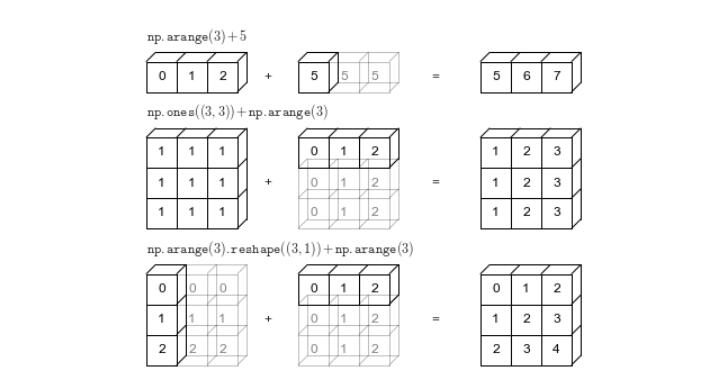

In [15]:
from IPython.display import Image
Image(filename=  'C:/Users/tianjiayang/data_science_101/pic/3.jpg')

Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.


Let's consider an operation on these two arrays. The shape of the arrays are

M.shape = (2, 3)
a.shape = (3,)
We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:

M.shape -> (2, 3)
a.shape -> (1, 3)
By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

M.shape -> (2, 3)
a.shape -> (2, 3)
The shapes match, and we see that the final shape will be (2, 3):

In [22]:
#Example 1
M = np.ones((2,3))
a= np.arange(3)
M+a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [28]:
#Example 2
a = np.arange(3).reshape((3,1))
b = np.arange(3)
print(a)
print(b)
a+b

[[0]
 [1]
 [2]]
[0 1 2]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [35]:
#Example 3
M = np.ones((3,2))
a = np.arange(3)
print(M.shape)
print(a.shape)
print(M)
print(a)
M+a

(3, 2)
(3,)
[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Note the potential confusion here: you could imagine making a and M compatible by, say, padding a's shape with ones on the right rather than the left. But this is not how the broadcasting rules work! That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity.

In [36]:
a =a [:,np.newaxis]


In [37]:
a.shape

(3, 1)

In [38]:
M+a

array([[ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.]])

# PART 2. Fancy Index

It means passing an array of indices to access multiple array elements at once. For example, consider the following array:

In [39]:
rand = np.random.RandomState(42)
x=rand.randint(100,size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [42]:
x[index]

array([71, 82, 74])

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [47]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [48]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [49]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])


# 2.2 Combined Indexing

In [50]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


We can combine fancy and simple indices:

In [51]:
X[2, [2, 0, 1]]

array([10,  8,  9])

We can also combine fancy indexing with slicing:

In [52]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])


And we can combine fancy indexing with masking:

In [53]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# Part 3 .Sorting in Numpy

selection sorting in python O(N^2)

In [4]:
import numpy as np 
def selection_sorting(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i],x[swap]) = (x[swap],x[i])
    return x

x_test = np.array([2, 1, 4, 3, 5])
selection_sorting(x_test)

array([1, 2, 3, 4, 5])

BogSort(extremely stupid...) O(N * N!)

In [6]:
def bogosort(x):
    while np.any(x[:-1]>x[1:]):
        np.random.shuffle(x)
    return x

x_test2 = np.array([2, 1, 4, 3, 5])
selection_sorting(x_test)

array([1, 2, 3, 4, 5])

# Fast Sorting in NumPy: np.sort and np.argsort

In-place sorting --- .sort()

In [8]:
x = np.array([4,6,12,-3,0,3])
x.sort()
print(x)

[-3  0  3  4  6 12]


A related function is argsort, which instead returns the indices of the sorted elements:

In [9]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [10]:
# the list of index can be used to reconstruct the sorted array:
x[i]

array([1, 2, 3, 4, 5])

# Partial sorts: Partitioning

Sometimes we're not interested in sorting the entire array, but simply want to find the k smallest values in the array. NumPy provides this in the np.partition function. np.partition takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [41]:
x = np.array([-6,7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([ 1, -6,  2,  3,  7,  6,  5,  4])

In [43]:
#partial sort along different axis

np.partition(X,1,axis=1)

array([[ 0.37454012,  0.95071431],
       [ 0.59865848,  0.73199394],
       [ 0.15599452,  0.15601864],
       [ 0.05808361,  0.86617615],
       [ 0.60111501,  0.70807258],
       [ 0.02058449,  0.96990985],
       [ 0.21233911,  0.83244264],
       [ 0.18182497,  0.18340451],
       [ 0.30424224,  0.52475643],
       [ 0.29122914,  0.43194502]])

Finally, just as there is a np.argsort that computes indices of the sort, there is a np.argpartition that computes indices of the partition. We'll see this in action in the following section.

# Example: k-Nearest Neighbors

In [ ]:
1. create some random points

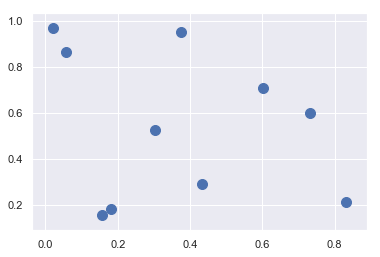

In [17]:
import matplotlib.pyplot as plt
import seaborn
import random
rand = np.random.RandomState(42)
seaborn.set()
X = rand.rand(10,2)
plt.scatter(X[:,0],X[:,1],s=100)


Now we'll compute the distance between each pair of points. Recall that the squared-distance between two points is the sum of the squared differences in each dimension; using the efficient broadcasting (Computation on Arrays: Broadcasting) and aggregation (Aggregations: Min, Max, and Everything In Between) routines provided by NumPy we can compute the matrix of square distances in a single line of code:

# a very powerful tool -- np.newaxis:
np.newaxis的功能是插入新维度，看下面的例子：

a=np.array([1,2,3,4,5])
print a.shape
print a

输出结果

(5,)
[1 2 3 4 5]

可以看出a是一个一维数组,

x_data=np.linspace(-1,1,300)[:,np.newaxis]
a=np.array([1,2,3,4,5])
b=a[np.newaxis,:]
print a.shape,b.shape
print a
print b

输出结果：

(5,) (1, 5)
[1 2 3 4 5]
[[1 2 3 4 5]]



x_data=np.linspace(-1,1,300)[:,np.newaxis]
a=np.array([1,2,3,4,5])
b=a[:,np.newaxis]
print a.shape,b.shape
print a
print b

输出结果

(5,) (5, 1)
[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]

可以看出np.newaxis分别是在行或列上增加维度，原来是（6，）的数组，在行上增加维度变成（1,6）的二维数组，在列上增加维度变为(6,1)的二维数组

about np.sum()
>>> np.sum([0.5, 1.5])

2.0

>>> np.sum([0.5, 0.7, 0.2, 1.5], dtype=np.int32)

1

>>> np.sum([[0, 1], [0, 5]])

6

>>> np.sum([[0, 1], [0, 5]], axis=0)

array([0, 6])

>>> np.sum([[0, 1], [0, 5]], axis=1)

array([1, 5])

In [20]:
distance_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:])**2,axis = -1)

Above code is hard to understand, let's break it down

In [33]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [37]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [32]:

# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq

array([[ 0.        ,  0.25171654,  0.67933117,  0.10729142,  0.11021119,
         0.12565305,  0.75487265,  0.62590345,  0.1863819 ,  0.43821601],
       [ 0.25171654,  0.        ,  0.52769893,  0.52572083,  0.02910074,
         0.64393098,  0.1593326 ,  0.47512176,  0.18843303,  0.18454216],
       [ 0.67933117,  0.52769893,  0.        ,  0.51394921,  0.50290096,
         0.68080058,  0.46072414,  0.00141727,  0.15795558,  0.09442377],
       [ 0.10729142,  0.52572083,  0.51394921,  0.        ,  0.31987984,
         0.01216687,  1.02713477,  0.48148903,  0.17716149,  0.47033641],
       [ 0.11021119,  0.02910074,  0.50290096,  0.31987984,  0.        ,
         0.40557444,  0.29926414,  0.45108072,  0.12173825,  0.20237694],
       [ 0.12565305,  0.64393098,  0.68080058,  0.01216687,  0.40557444,
         0.        ,  1.23302708,  0.64458914,  0.27862329,  0.62982499],
       [ 0.75487265,  0.1593326 ,  0.46072414,  1.02713477,  0.29926414,
         1.23302708,  0.        ,  0.42414057

In [38]:
#let's double-check
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [40]:
nearest = np.argsort(dist_sq,axis = 1)
print(nearest)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

In [45]:
#let's say if we want to find k=2 Nearest neighbors
K=2 
nearest_partition = np.argpartition(dist_sq,K+1,axis=1)
print(nearest_partition)

[[3 0 4 5 8 9 1 7 2 6]
 [1 4 6 9 3 5 2 7 8 0]
 [2 7 9 8 6 4 5 1 3 0]
 [3 5 0 8 4 1 6 7 2 9]
 [1 4 0 8 9 6 2 7 5 3]
 [5 3 0 8 4 1 6 7 2 9]
 [1 9 6 4 3 5 2 7 8 0]
 [7 2 9 8 6 4 5 1 3 0]
 [8 9 4 7 2 3 0 1 5 6]
 [8 7 9 2 1 6 4 5 3 0]]


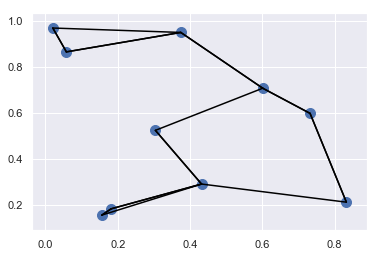

In [47]:
#let's plot it

plt.scatter(X[:,0],X[:,1],s=100)
  # draw lines from each point to its two nearest neighbors# draw l 
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

Why we do this:
    Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python. You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.